In [12]:
import os
import pickle

import pandas as pd
import numpy as np
import researchpy as rp
import scipy.stats as stats

import geopandas as gpd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

import matplotlib as mpl

import warnings
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
pd.options.display.max_rows = 4000
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

## Import local class
from apply_brf import SplitTrainAndPredict

In [13]:
## Define your path
PATH = r"D:\francisco_madrigal\Desktop\Tesis\modelo"

def create_path(file_path, path=PATH):
    
    return os.path.join(path, file_path)

In [14]:
## Open dictionary of crimes
crime_cat_file = open(create_path("crime_cat_dict.pkl"), "rb")
crime_cat_dict = pickle.load(crime_cat_file)

In [15]:
## Read neighborhoods DataFrame for later use
colonias = gpd.read_file(create_path(r"colonias_fixed\colonias_fixed.shp"))

## Declare the used coordinate system
colonias.crs = "epsg:4326"

## Print Coordinate Reference System (CRS)
# This is importan to homologue all crs from other georeferenced DataFrames
colonias.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ver https://imbalanced-learn.org/stable/index.html

## Data Transformation

In [16]:
## Read DataFrame
matrix_crimes = pd.read_csv(create_path("base_crimenes.csv"),
                            parse_dates =['Hora'])

## Create dummies
#matrix_crimes = pd.get_dummies(matrix_crimes, columns=['id_colonia', 'day_period', 'dia_semana', 'month'],
#                               prefix=["colonia", "day_per", "weekday", "month"], sparse=True)
            

## Show the balance of crimes DataFrame
matrix_crimes.value_counts(subset=["crimen"], normalize=True).to_frame('Relative').merge(
    
    matrix_crimes.value_counts(subset=["crimen"]).to_frame('Absolute'),
    on='crimen')

,Relative,Absolute
crimen,,
0,0.985228,11618371
1,0.014772,174197


In [17]:
## Merge to locate the Municipality for each nieghborhood
matrix_crimes = matrix_crimes.merge(colonias[['id_colonia', 'alcaldi']],
                                   how='left',
                                   on='id_colonia')

## Create an empty DataFrame to save the predictions for each municipality
results_brf = pd.DataFrame({})

## Create an empty DataFrame to save all scores of applied models
all_scores = pd.DataFrame({})

## Create an empty DataFrame to save tran-test-split results
train_test_table = pd.DataFrame({})

In [18]:
## Drop variables that can't be used to predict on future dates
matrix_crimes = matrix_crimes.drop(['TEMP','PRCP','CO','O3','PM10','change_accidents'], axis=1)

### Apply Balanced Random Forest

----------------------------------------------------------------------------------------------------
|MIGUEL HIDALGO|


Total features:  141
Observations:  540986


***TRAIN TABLE***
   Relative  Absolute
0  0.977866    529012
1  0.022134     11974


***TEST TABLE***
   Relative  Absolute
0  0.984538     31900
1  0.015462       501
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.821



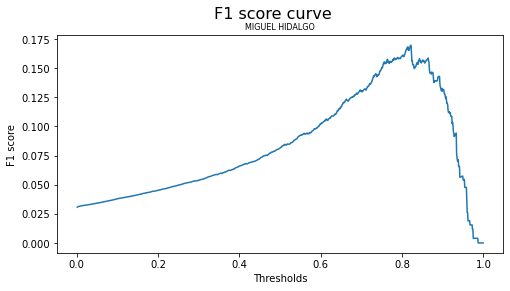

Results of Balanced Random Forest:

   F1 Score: 0.16978193146417447
   Accuracy: 0.9670997808709608
   Balanced Accuracy: 0.5982181718068565
   AUC: 0.8073176843804554


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     31900
           1       0.14      0.22      0.17       501

    accuracy                           0.97     32401
   macro avg       0.56      0.60      0.58     32401
weighted avg       0.97      0.97      0.97     32401

***************************


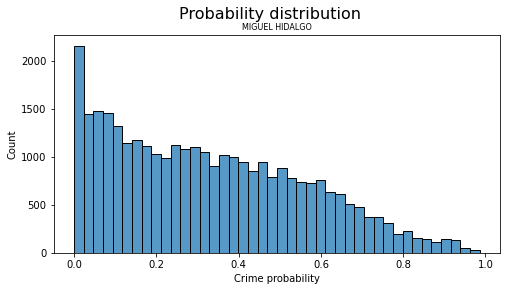

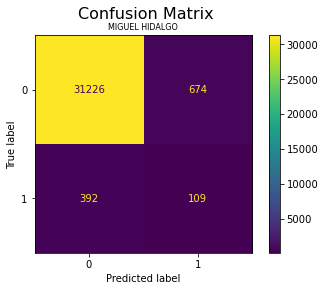

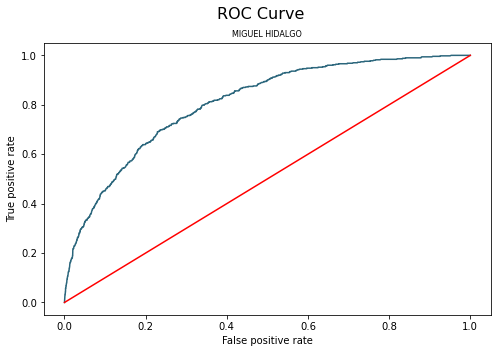

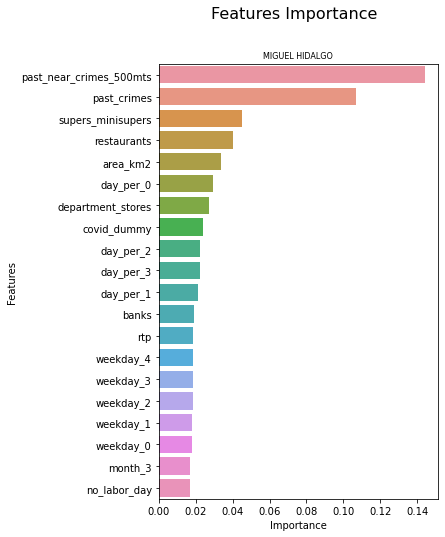

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|COYOACAN|


Total features:  207
Observations:  945772


***TRAIN TABLE***
   Relative  Absolute
0  0.990249    936550
1  0.009751      9222


***TEST TABLE***
   Relative  Absolute
0  0.993084     56285
1  0.006916       392
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.864



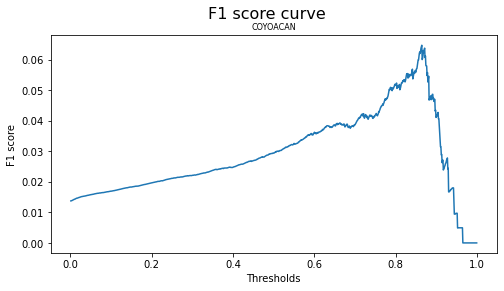

Results of Balanced Random Forest:

   F1 Score: 0.06473594548551957
   Accuracy: 0.9806270621239657
   Balanced Accuracy: 0.5418601668259024
   AUC: 0.7591364466191557


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56285
           1       0.05      0.10      0.06       392

    accuracy                           0.98     56677
   macro avg       0.52      0.54      0.53     56677
weighted avg       0.99      0.98      0.98     56677

***************************


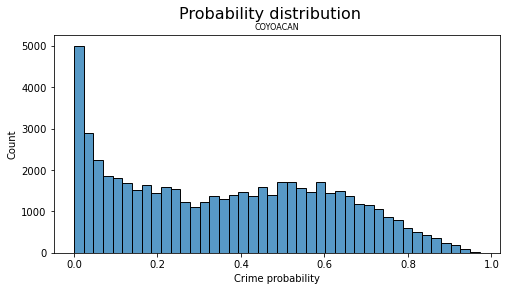

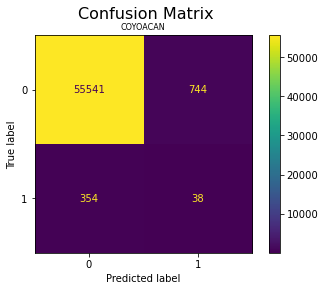

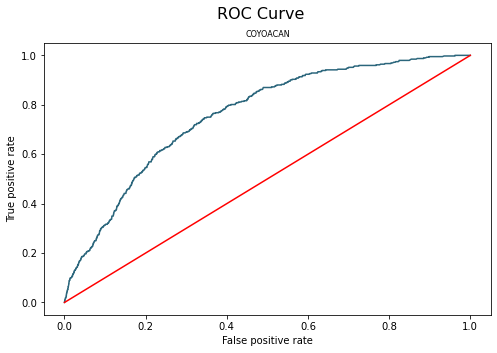

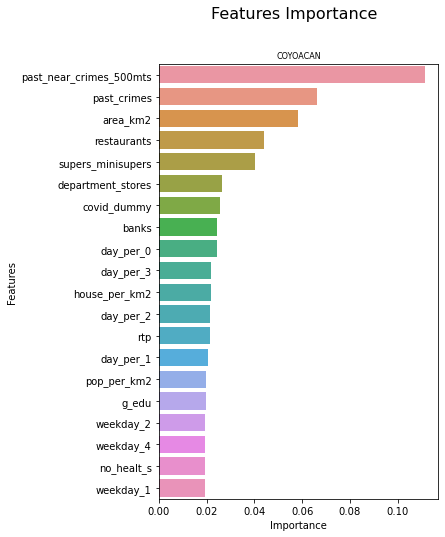

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|VENUSTIANO CARRANZA|


Total features:  134
Observations:  497730


***TRAIN TABLE***
   Relative  Absolute
0  0.978695    487126
1  0.021305     10604


***TEST TABLE***
   Relative  Absolute
0  0.986114     29401
1  0.013886       414
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.733



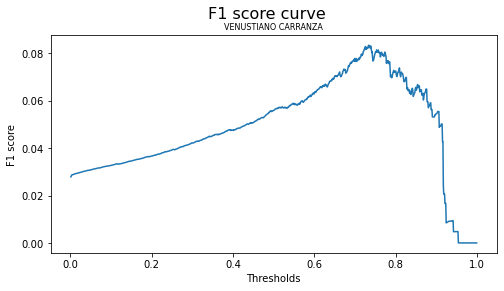

Results of Balanced Random Forest:

   F1 Score: 0.08343763037129745
   Accuracy: 0.9263122589300687
   Balanced Accuracy: 0.5887502265442679
   AUC: 0.7448959966690805


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     29401
           1       0.05      0.24      0.08       414

    accuracy                           0.93     29815
   macro avg       0.52      0.59      0.52     29815
weighted avg       0.98      0.93      0.95     29815

***************************


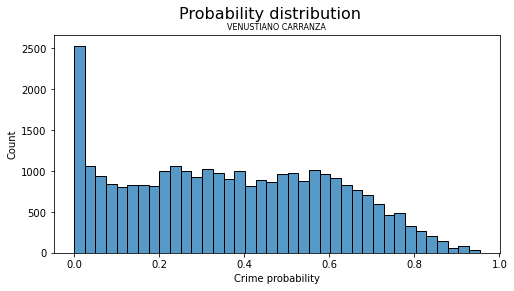

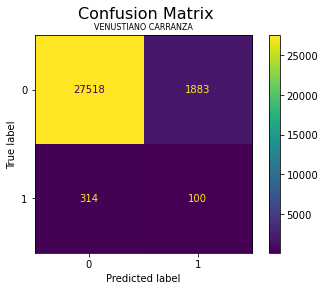

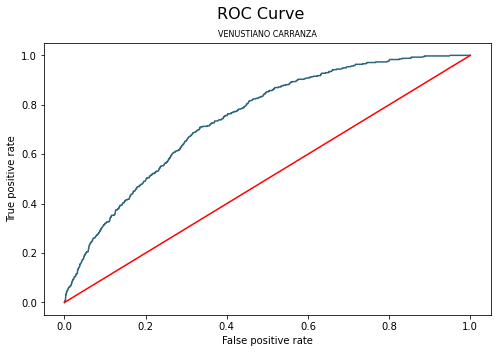

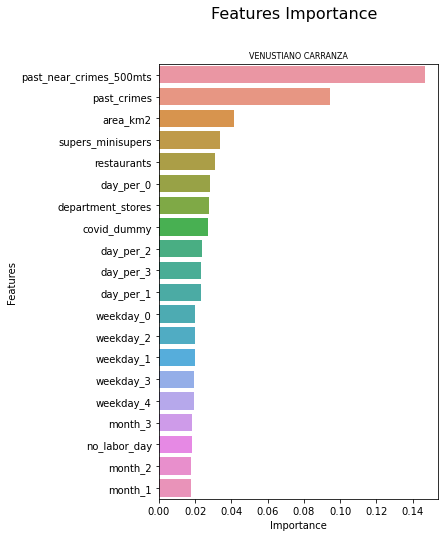

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|LA MAGDALENA CONTRERAS|


Total features:  105
Observations:  319293


***TRAIN TABLE***
   Relative  Absolute
0  0.994153    317426
1  0.005847      1867


***TEST TABLE***
   Relative  Absolute
0  0.994409     19030
1  0.005591       107
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.878



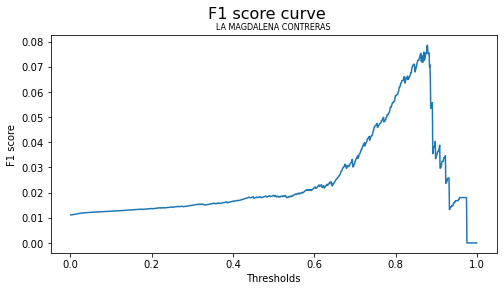

Results of Balanced Random Forest:

   F1 Score: 0.07854984894259819
   Accuracy: 0.9840622877148978
   Balanced Accuracy: 0.5552037854641712
   AUC: 0.6991840232588976


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19030
           1       0.06      0.12      0.08       107

    accuracy                           0.98     19137
   macro avg       0.53      0.56      0.54     19137
weighted avg       0.99      0.98      0.99     19137

***************************


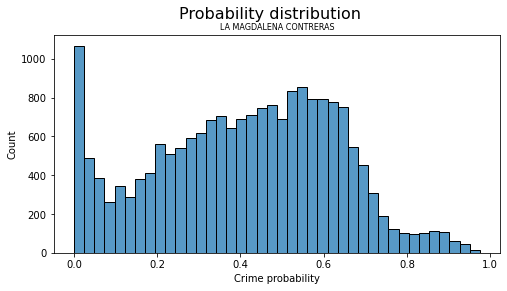

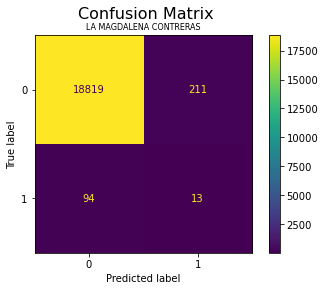

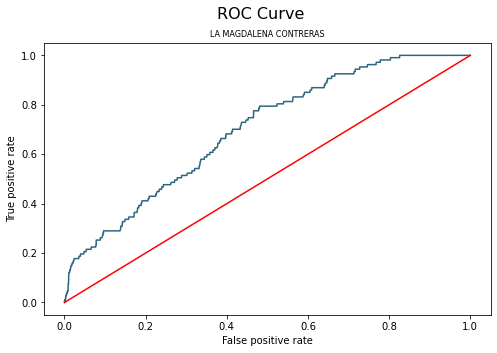

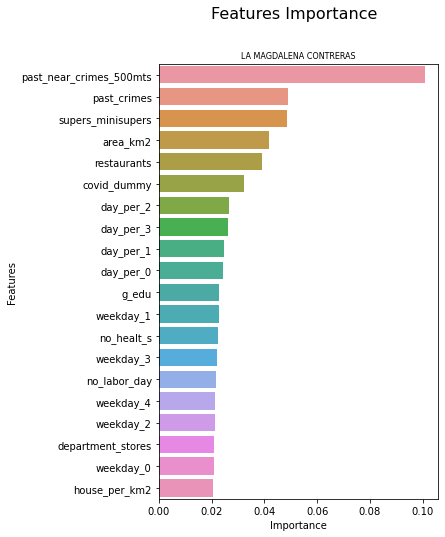

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|BENITO JUAREZ|


Total features:  117
Observations:  393261


***TRAIN TABLE***
   Relative  Absolute
0    0.9743    383154
1    0.0257     10107


***TEST TABLE***
   Relative  Absolute
0  0.983911     23177
1  0.016089       379
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.673



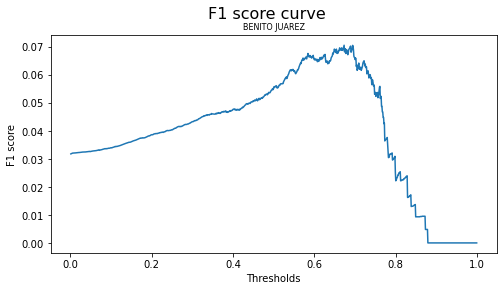

Results of Balanced Random Forest:

   F1 Score: 0.07056451612903225
   Accuracy: 0.9217184581422992
   Balanced Accuracy: 0.5592335591546664
   AUC: 0.6838898835541514


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     23177
           1       0.04      0.18      0.07       379

    accuracy                           0.92     23556
   macro avg       0.51      0.56      0.51     23556
weighted avg       0.97      0.92      0.94     23556

***************************


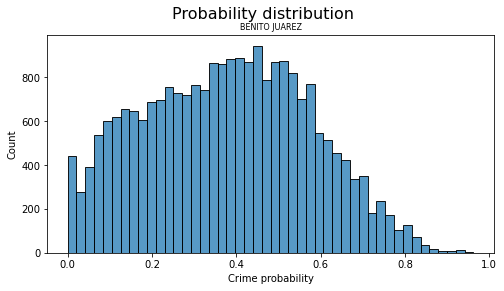

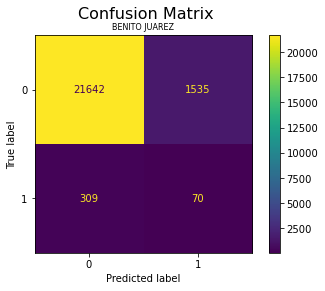

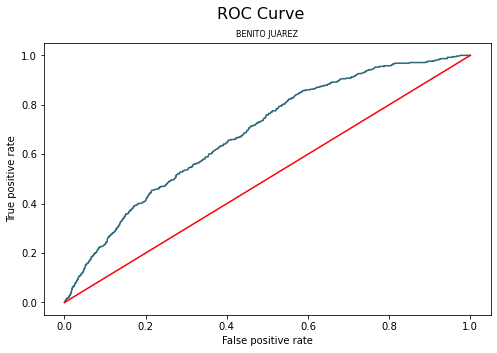

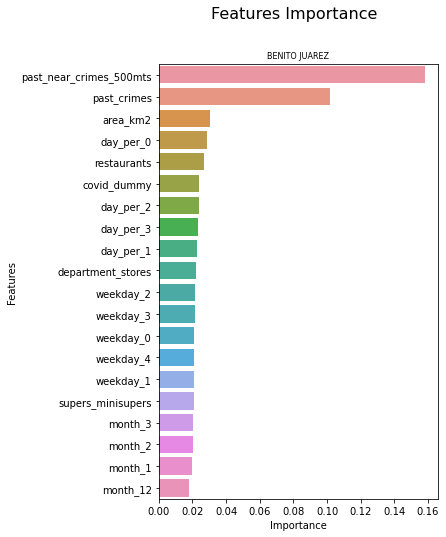

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|GUSTAVO A. MADERO|


Total features:  285
Observations:  1424883


***TRAIN TABLE***
   Relative  Absolute
0  0.986644   1405852
1  0.013356     19031


***TEST TABLE***
   Relative  Absolute
0  0.991708     84678
1  0.008292       708
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.801



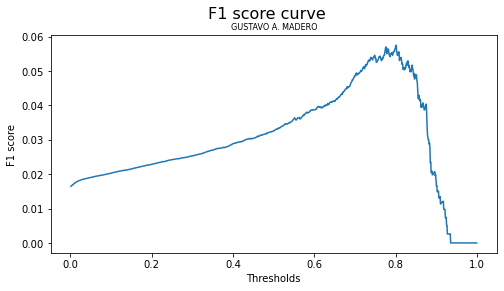

Results of Balanced Random Forest:

   F1 Score: 0.057494866529774126
   Accuracy: 0.9623708804722085
   Balanced Accuracy: 0.5538390497041434
   AUC: 0.7497294169751466


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     84678
           1       0.04      0.14      0.06       708

    accuracy                           0.96     85386
   macro avg       0.51      0.55      0.52     85386
weighted avg       0.98      0.96      0.97     85386

***************************


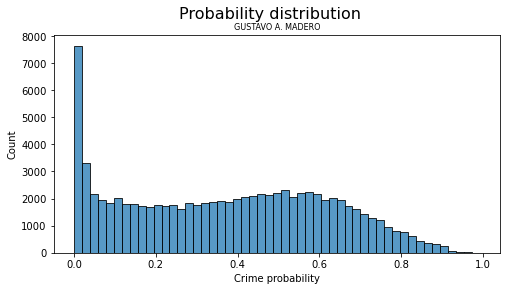

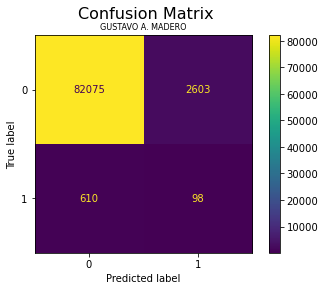

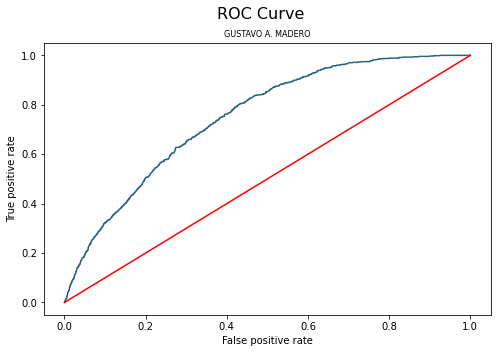

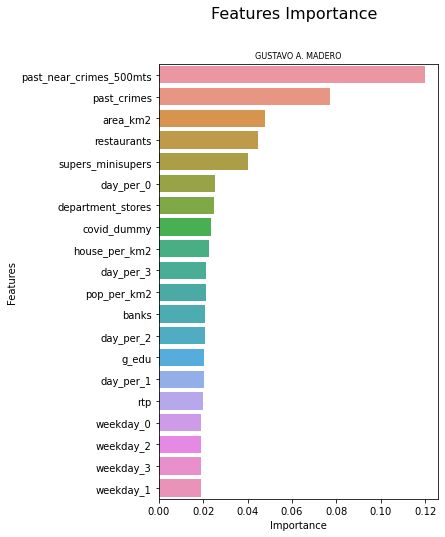

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|TLALPAN|


Total features:  230
Observations:  1086890


***TRAIN TABLE***
   Relative  Absolute
0  0.992628   1078877
1  0.007372      8013


***TEST TABLE***
   Relative  Absolute
0  0.994166     64760
1  0.005834       380
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.846



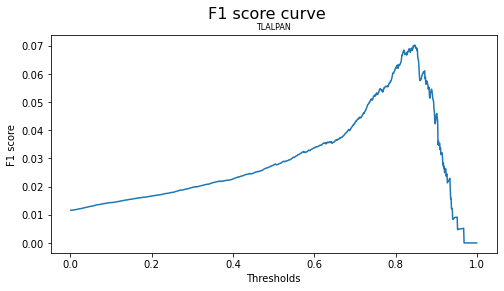

Results of Balanced Random Forest:

   F1 Score: 0.07017543859649122
   Accuracy: 0.9682683451028554
   Balanced Accuracy: 0.5890043399109262
   AUC: 0.7797409869640128


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     64760
           1       0.04      0.21      0.07       380

    accuracy                           0.97     65140
   macro avg       0.52      0.59      0.53     65140
weighted avg       0.99      0.97      0.98     65140

***************************


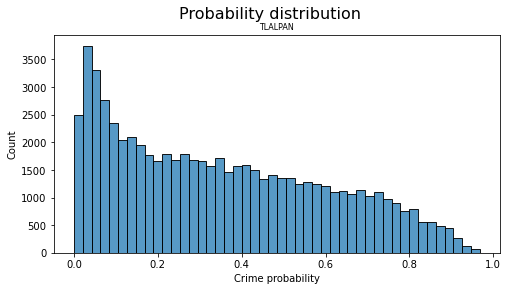

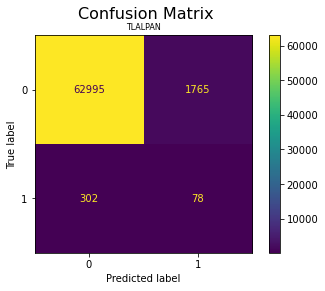

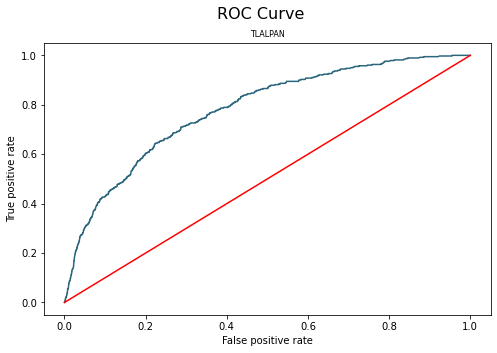

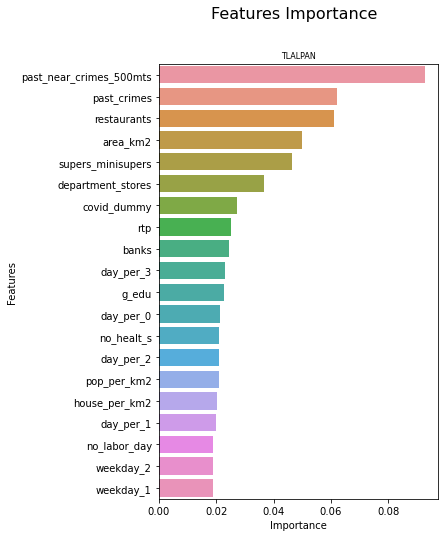

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|AZCAPOTZALCO|


Total features:  164
Observations:  681699


***TRAIN TABLE***
   Relative  Absolute
0  0.987672    673295
1  0.012328      8404


***TEST TABLE***
   Relative  Absolute
0  0.992387     40539
1  0.007613       311
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.783



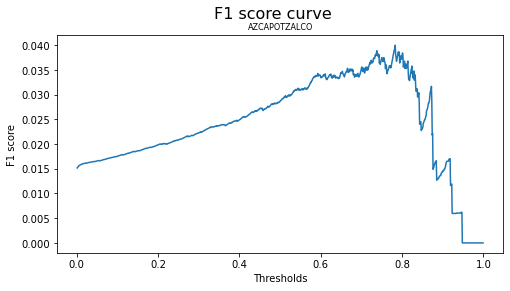

Results of Balanced Random Forest:

   F1 Score: 0.04
   Accuracy: 0.9565238678090575
   Balanced Accuracy: 0.5409601599158731
   AUC: 0.7168460461518974


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     40539
           1       0.02      0.12      0.04       311

    accuracy                           0.96     40850
   macro avg       0.51      0.54      0.51     40850
weighted avg       0.99      0.96      0.97     40850

***************************


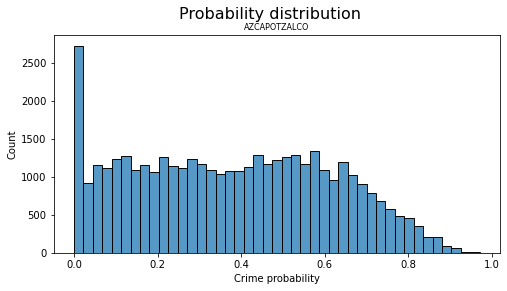

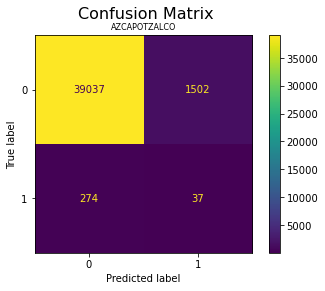

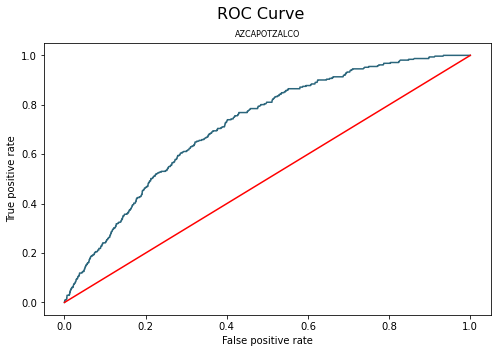

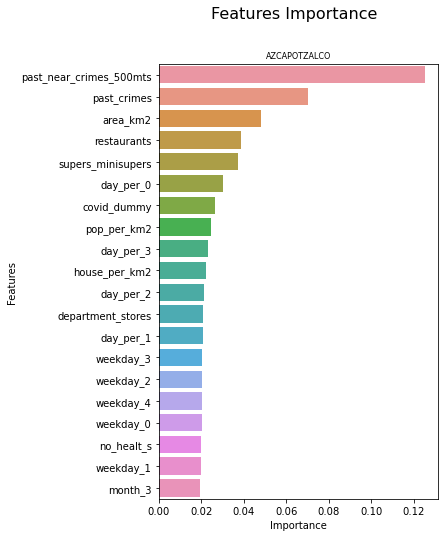

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|XOCHIMILCO|


Total features:  132
Observations:  485222


***TRAIN TABLE***
   Relative  Absolute
0  0.987216    479019
1  0.012784      6203


***TEST TABLE***
   Relative  Absolute
0  0.990473     28799
1  0.009527       277
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.739



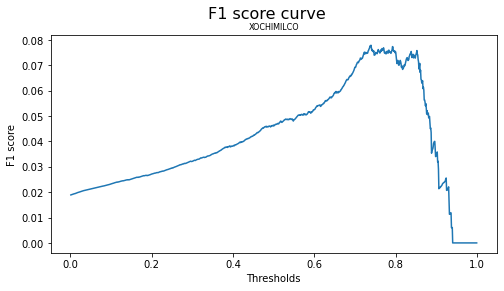

Results of Balanced Random Forest:

   F1 Score: 0.07792207792207792
   Accuracy: 0.9072086944559087
   Balanced Accuracy: 0.661764228426002
   AUC: 0.7860284082768116


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     28799
           1       0.04      0.41      0.08       277

    accuracy                           0.91     29076
   macro avg       0.52      0.66      0.51     29076
weighted avg       0.98      0.91      0.94     29076

***************************


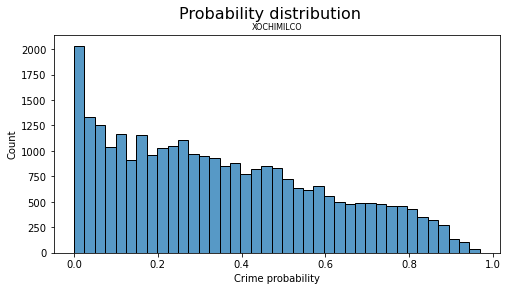

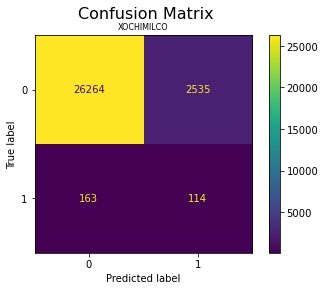

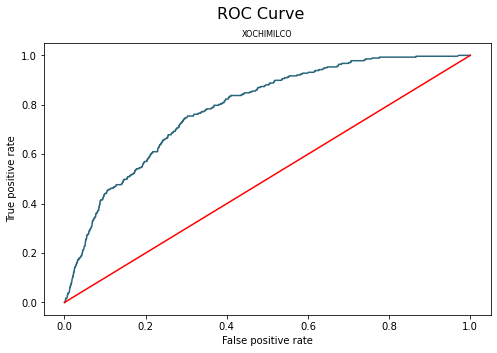

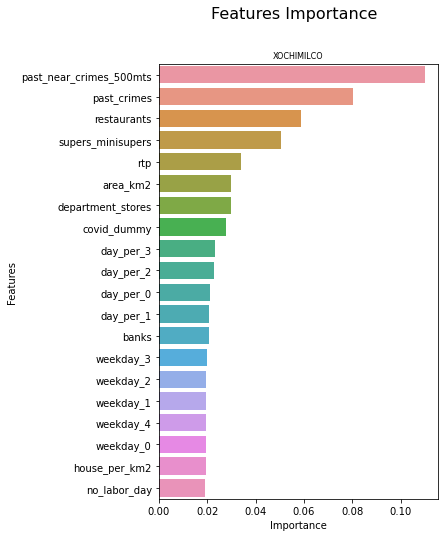

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|MILPA ALTA|


Total features:  64
Observations:  67556


***TRAIN TABLE***
   Relative  Absolute
0  0.988928     66808
1  0.011072       748


***TEST TABLE***
   Relative  Absolute
0  0.990366      4009
1  0.009634        39
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.893



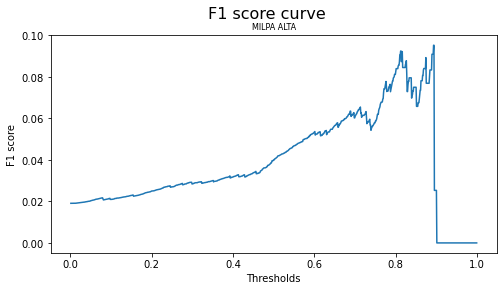

Results of Balanced Random Forest:

   F1 Score: 0.09523809523809523
   Accuracy: 0.9812252964426877
   Balanced Accuracy: 0.5461685566449846
   AUC: 0.7401327781721894


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4009
           1       0.09      0.10      0.10        39

    accuracy                           0.98      4048
   macro avg       0.54      0.55      0.54      4048
weighted avg       0.98      0.98      0.98      4048

***************************


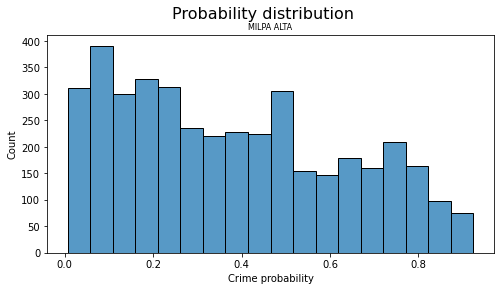

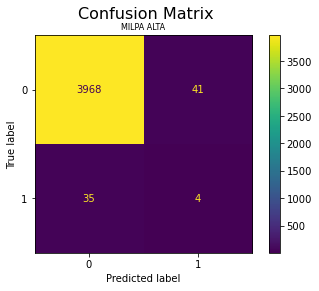

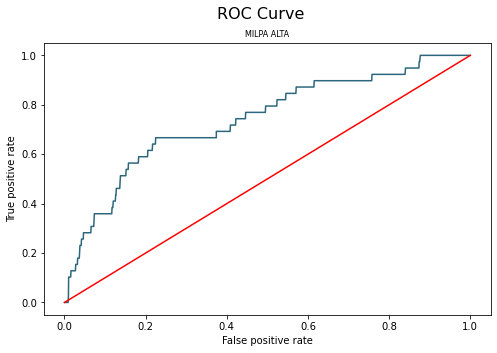

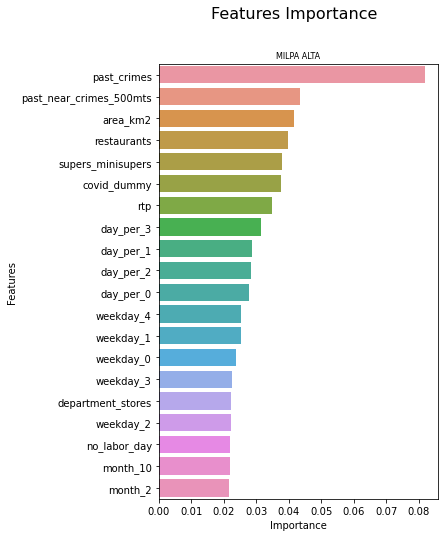

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|ALVARO OBREGON|


Total features:  303
Observations:  1535199


***TRAIN TABLE***
   Relative  Absolute
0   0.99287   1524253
1   0.00713     10946


***TEST TABLE***
   Relative  Absolute
0   0.99362     91419
1   0.00638       587
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.811



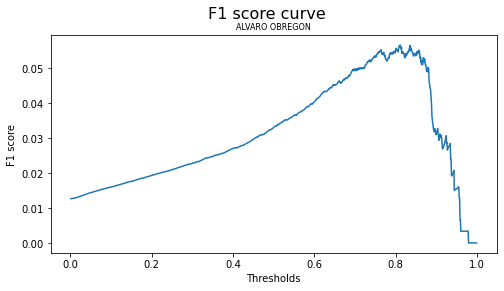

Results of Balanced Random Forest:

   F1 Score: 0.056607534383097464
   Accuracy: 0.9485577027585157
   Balanced Accuracy: 0.5975015482282535
   AUC: 0.8058196126478541


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     91419
           1       0.03      0.24      0.06       587

    accuracy                           0.95     92006
   macro avg       0.51      0.60      0.52     92006
weighted avg       0.99      0.95      0.97     92006

***************************


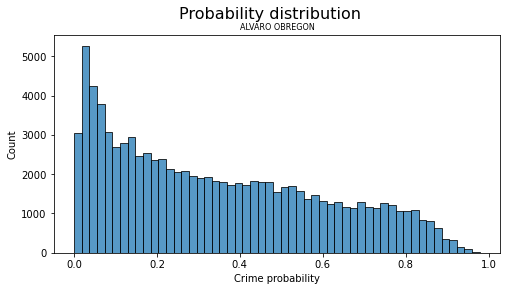

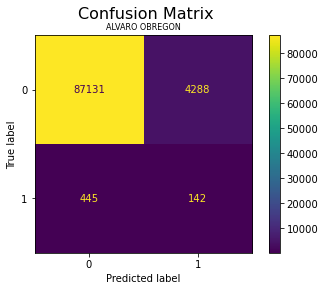

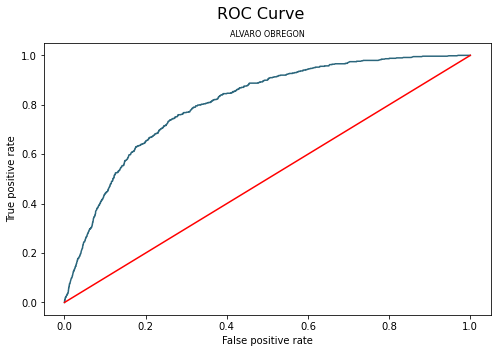

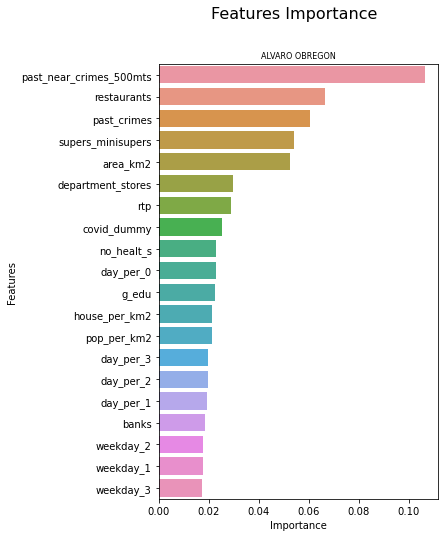

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|IZTACALCO|


Total features:  108
Observations:  338146


***TRAIN TABLE***
   Relative  Absolute
0  0.974135    329400
1  0.025865      8746


***TEST TABLE***
   Relative  Absolute
0  0.985235     19951
1  0.014765       299
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.663



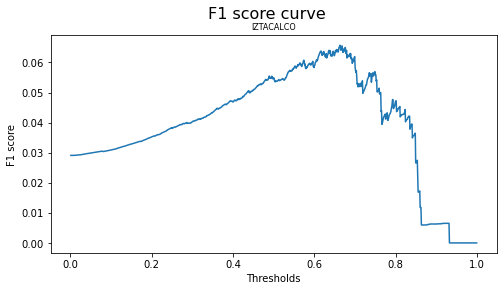

Results of Balanced Random Forest:

   F1 Score: 0.0657370517928287
   Accuracy: 0.9073580246913581
   Balanced Accuracy: 0.5691920120683635
   AUC: 0.7137910958772069


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     19951
           1       0.04      0.22      0.07       299

    accuracy                           0.91     20250
   macro avg       0.51      0.57      0.51     20250
weighted avg       0.97      0.91      0.94     20250

***************************


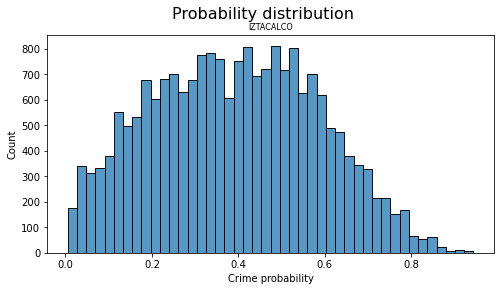

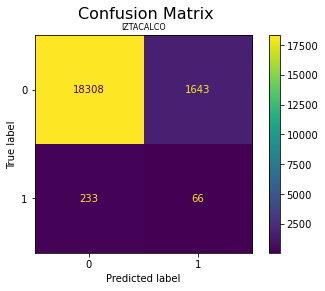

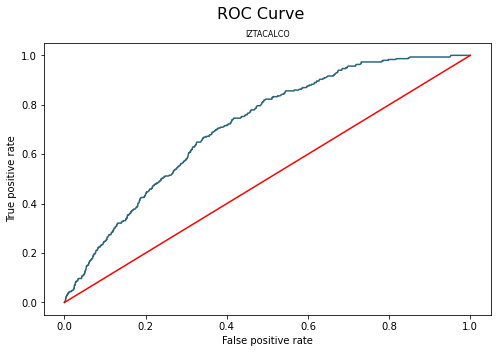

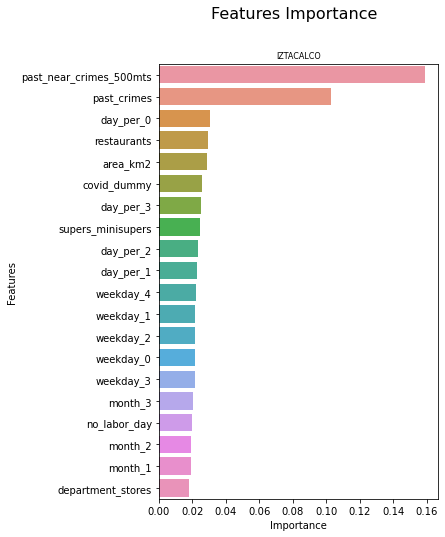

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|CUAUHTEMOC|


Total features:  116
Observations:  389216


***TRAIN TABLE***
   Relative  Absolute
0   0.94223    366731
1   0.05777     22485


***TEST TABLE***
   Relative  Absolute
0  0.971772     22549
1  0.028228       655
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.609



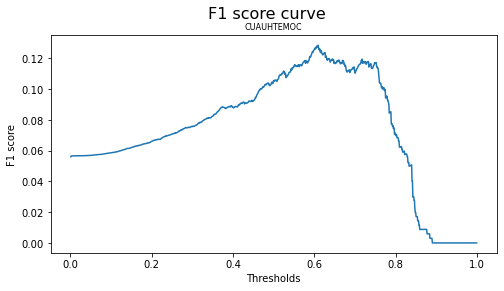

Results of Balanced Random Forest:

   F1 Score: 0.12853470437017994
   Accuracy: 0.912342699534563
   Balanced Accuracy: 0.5805998742687257
   AUC: 0.682276020432517


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     22549
           1       0.09      0.23      0.13       655

    accuracy                           0.91     23204
   macro avg       0.53      0.58      0.54     23204
weighted avg       0.95      0.91      0.93     23204

***************************


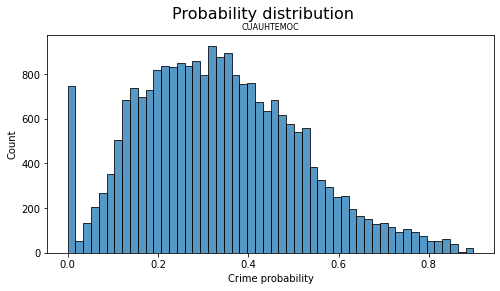

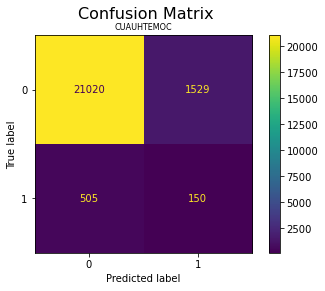

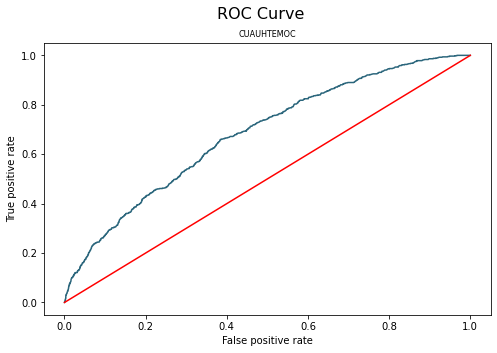

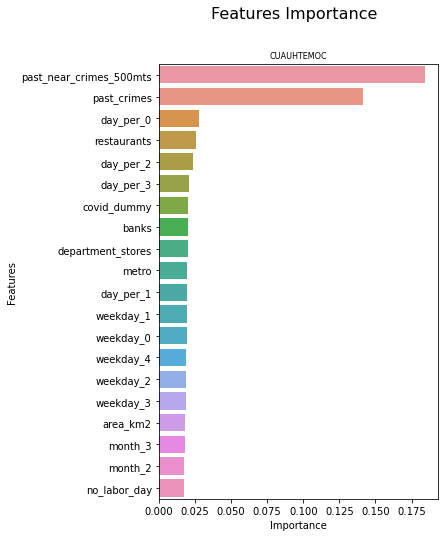

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|TLAHUAC|


Total features:  111
Observations:  356214


***TRAIN TABLE***
   Relative  Absolute
0  0.986357    351354
1  0.013643      4860


***TEST TABLE***
   Relative  Absolute
0  0.987447     21081
1  0.012553       268
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.739



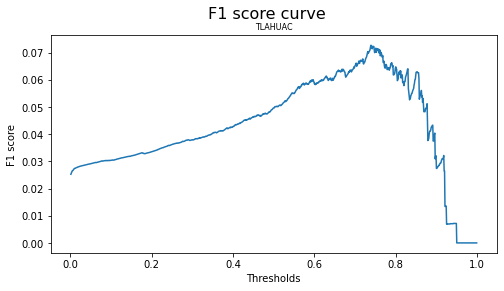

Results of Balanced Random Forest:

   F1 Score: 0.07271171941830624
   Accuracy: 0.898449576092557
   Balanced Accuracy: 0.611501780268998
   AUC: 0.7506659636214826


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     21081
           1       0.04      0.32      0.07       268

    accuracy                           0.90     21349
   macro avg       0.52      0.61      0.51     21349
weighted avg       0.98      0.90      0.94     21349

***************************


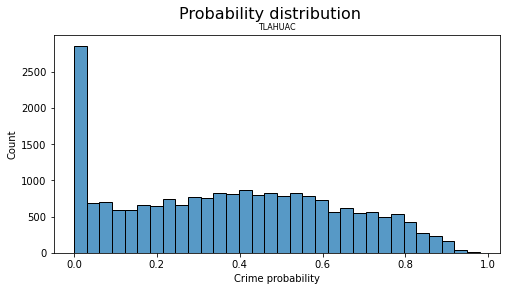

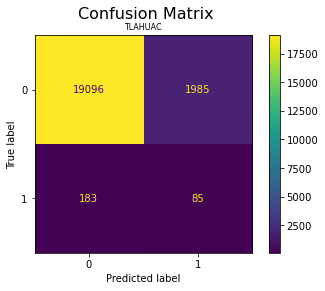

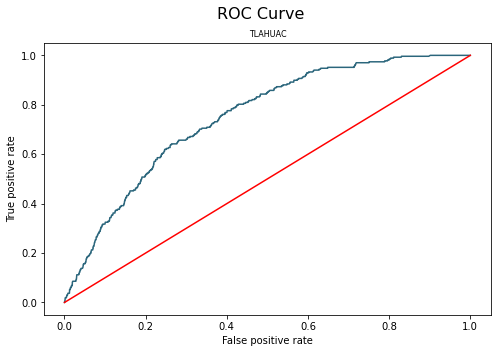

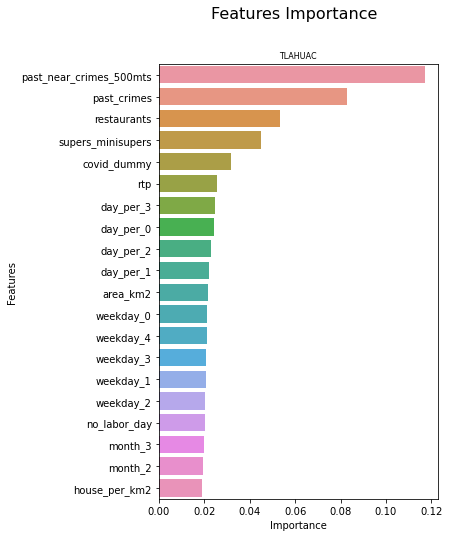

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|IZTAPALAPA|


Total features:  346
Observations:  1799905


***TRAIN TABLE***
   Relative  Absolute
0  0.981512   1766628
1  0.018488     33277


***TEST TABLE***
   Relative  Absolute
0  0.988706    106626
1  0.011294      1218
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.803



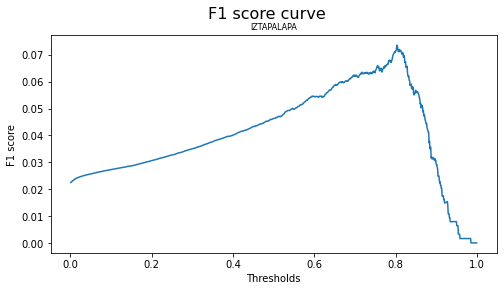

Results of Balanced Random Forest:

   F1 Score: 0.07353608715388107
   Accuracy: 0.9621490300804866
   Balanced Accuracy: 0.552312678198711
   AUC: 0.7489727071746597


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    106626
           1       0.05      0.13      0.07      1218

    accuracy                           0.96    107844
   macro avg       0.52      0.55      0.53    107844
weighted avg       0.98      0.96      0.97    107844

***************************


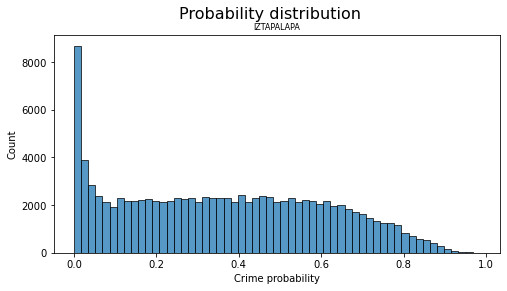

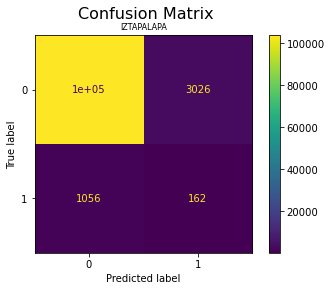

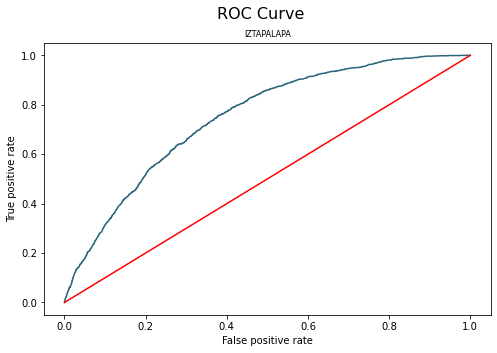

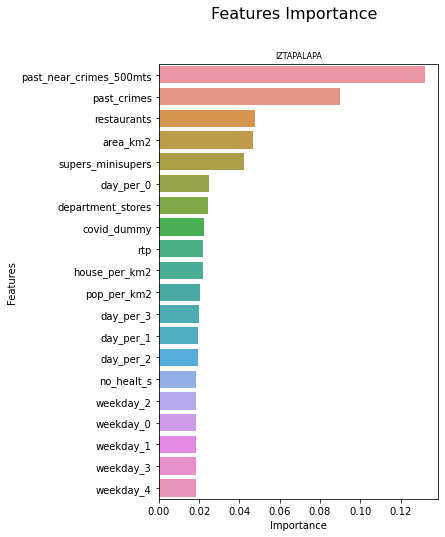

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
|CUAJIMALPA DE MORELOS|


Total features:  96
Observations:  264032


***TRAIN TABLE***
   Relative  Absolute
0  0.995773    262916
1  0.004227      1116


***TEST TABLE***
   Relative  Absolute
0  0.996272     15766
1  0.003728        59
----------------------------------------------------------------------------------------------------
Fitted Balanced Random Forest:

   Number of trees: 800
   Max features: sqrt
   Threshold that max F1: 0.896



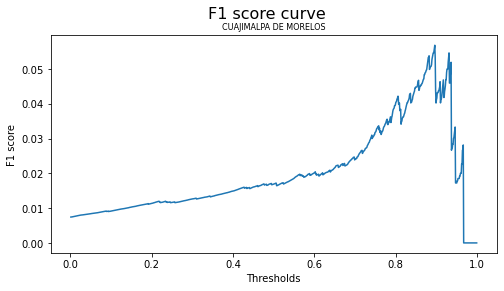

Results of Balanced Random Forest:

   F1 Score: 0.056847545219638244
   Accuracy: 0.9769352290679305
   Balanced Accuracy: 0.5831670597746277
   AUC: 0.7752259206144094


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15766
           1       0.03      0.19      0.06        59

    accuracy                           0.98     15825
   macro avg       0.52      0.58      0.52     15825
weighted avg       0.99      0.98      0.98     15825

***************************


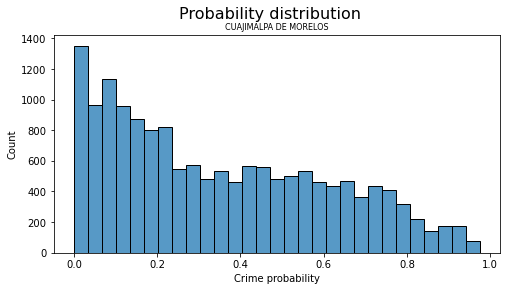

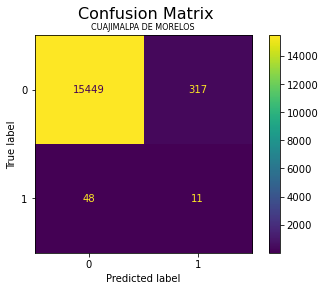

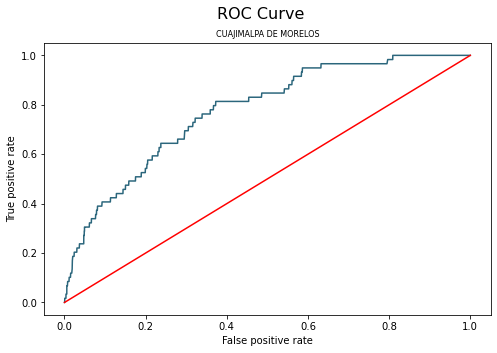

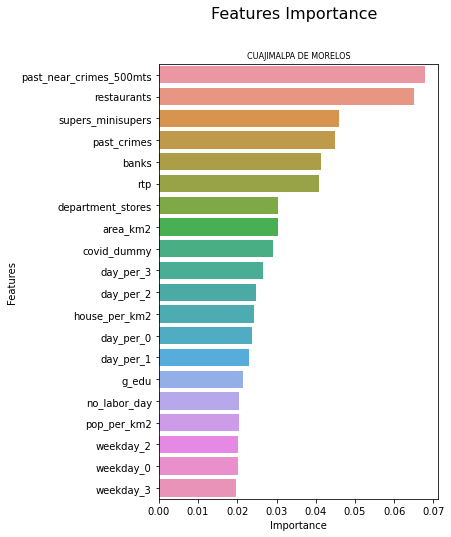

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------




In [16]:
## Loop for every Alcaldia (Municipality) and apply the model
alcaldias_list = colonias['alcaldi'].unique()

for alcaldia in alcaldias_list:
    
    ## Initialize the class model
    model = SplitTrainAndPredict(alcaldi=alcaldia, copy_df=matrix_crimes, colonias=colonias)

    ## Create tran-test splits
    X_train, X_test, y_train, y_test, save_columns, ind_test = model.train_test_df()

    ## Apply the model
    brf, predictions, crime_prob, threshold = model.fit_my_results(X_train, X_test, y_train, y_test)

    ## Show and save scores
    save_scores_df = model.show_my_results(y_test, crime_prob, predictions, threshold, brf, save_columns)

    ## Predict
    local_crimes_test = model.predict_crimes(X_test, ind_test, crime_prob, predictions, save_columns)

    ## Concat results
    results_brf = pd.concat([results_brf, local_crimes_test], ignore_index=True)
    all_scores = pd.concat([all_scores, save_scores_df], ignore_index=True)
    train_test_table = pd.concat([train_test_table, model.train_test_table], ignore_index=True)

In [17]:
if not os.path.isdir(create_path(r"df_results")):
    
    os.makedirs(create_path(r"df_results"))

## Save DataFrames results
results_brf.to_csv(create_path(r"df_results\results_brf.csv"), index=False)

all_scores.to_csv(create_path(r"df_results\all_scores.csv"), index=False)

train_test_table.to_csv(create_path(r"df_results\train_test_table.csv"), index=False)

## Finally, save a reduced form of the results DataFrame and Neighborhoods
reduced_results_brf = results_brf[['id_colonia', 'day_period', 'dia_semana', 'proba_crimen']]

reduced_results_brf.to_csv(create_path(r"df_results\reduced_results_brf.csv"), index=False)

reduced_colonias = colonias[['id_colonia', 'colonia', 'geometry']].copy()

reduced_colonias.to_csv(create_path(r"df_results\reduced_colonias.csv"), index=False)

In [19]:
results_brf = pd.read_csv(create_path(r"df_results\results_brf.csv"),low_memory=False,
                          parse_dates=['Hora'])

results_brf['geometry'] = gpd.GeoSeries.from_wkt(results_brf['geometry'])

results_brf = gpd.GeoDataFrame(results_brf, geometry='geometry')

Results of Balanced Random Forest:

   F1 Score: 0.07478332162098851
   Accuracy: 0.9525956997377596
   Balanced Accuracy: 0.5769196984068939
   AUC: 0.7448168205401235


      ***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    659970
           1       0.05      0.19      0.07      6594

    accuracy                           0.95    666564
   macro avg       0.52      0.58      0.53    666564
weighted avg       0.98      0.95      0.97    666564

***************************


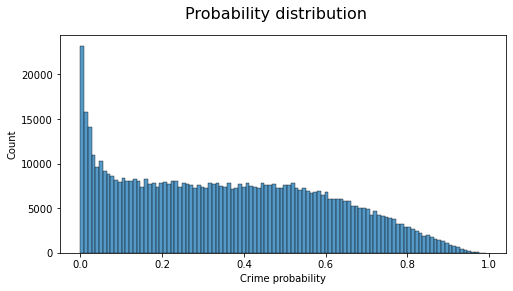

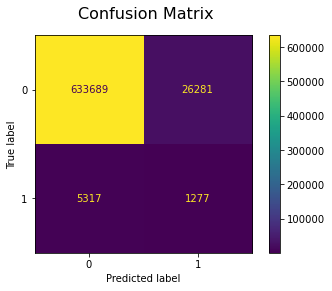

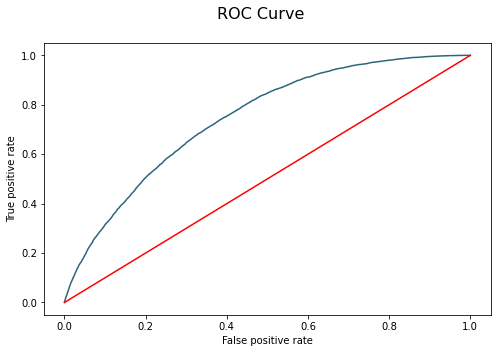

In [20]:
## Show aggregated results
model = SplitTrainAndPredict(copy_df=matrix_crimes, colonias=colonias, alcaldi="")


model.show_my_results(results_brf['crimen'], results_brf['proba_crimen'], results_brf['predictions'],
                      return_res_df=False)

### Probability analysis

In [22]:
summary, results = rp.ttest(group1= results_brf['proba_crimen'][results_brf['crimen'] == 1], group1_name= "Crime",
                            group2= results_brf['proba_crimen'][results_brf['crimen'] == 0], group2_name= "Non-Crime")
print(summary)


    Variable         N      Mean        SD        SE  95% Conf.  Interval
0      Crime    6594.0  0.572588  0.208556  0.002568   0.567553  0.577622
1  Non-Crime  659970.0  0.357656  0.241723  0.000298   0.357073  0.358239
2   combined  666564.0  0.359782  0.242353  0.000297   0.359201  0.360364


In [23]:
print(results)

                  Independent t-test      results
0  Difference (Crime - Non-Crime) =        0.2149
1              Degrees of freedom =   666562.0000
2                               t =       71.9360
3           Two side test p value =        0.0000
4          Difference < 0 p value =        1.0000
5          Difference > 0 p value =        0.0000
6                       Cohen's d =        0.8903
7                       Hedge's g =        0.8903
8                   Glass's delta =        1.0306
9                     Pearson's r =        0.0878


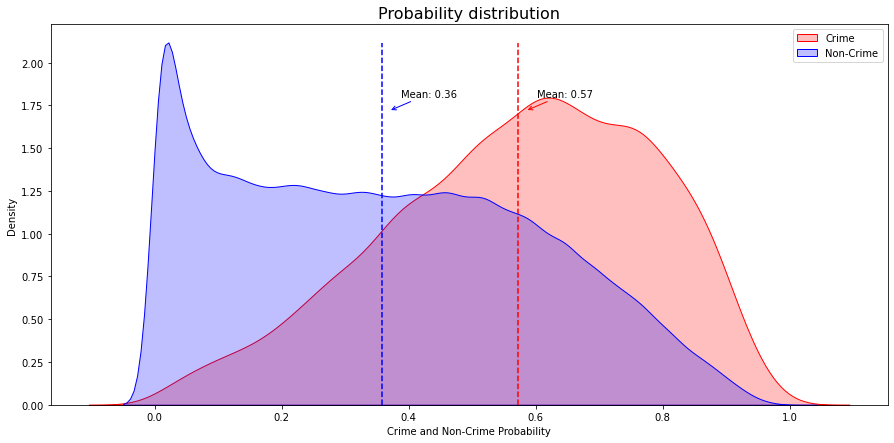

In [24]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 1], shade=True, ax=ax,
               color='red')
b = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 0], shade=True, ax=ax,
               color='blue')       

plt.title('Probability distribution', fontdict={'fontsize': 16})

plt.xlabel('Crime and Non-Crime Probability')

plt.ylabel('Density')
plt.legend(labels=['Crime','Non-Crime'])

ax.axvline(x=results_brf['proba_crimen'][results_brf['crimen'] == 1].mean(), ymax=0.95, linestyle='--', color='red')
plt.annotate(
    'Mean: ' + '{:,.2f}'.format(results_brf['proba_crimen'][results_brf['crimen'] == 1].mean()),
    xy=(results_brf['proba_crimen'][results_brf['crimen'] == 1].mean(), 1.7),
    xytext=(results_brf['proba_crimen'][results_brf['crimen'] == 1].mean()+.03, 1.8),
    arrowprops=dict(arrowstyle='->', color='red', shrinkB=10))

ax.axvline(x=results_brf['proba_crimen'][results_brf['crimen'] == 0].mean(), ymax=0.95, linestyle='--', color='blue')

plt.annotate(
    'Mean: ' + '{:,.2f}'.format(results_brf['proba_crimen'][results_brf['crimen'] == 0].mean()),
    xy=(results_brf['proba_crimen'][results_brf['crimen'] == 0].mean(), 1.7),
    xytext=(results_brf['proba_crimen'][results_brf['crimen'] == 0].mean()+.03, 1.8),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10))

plt.show()

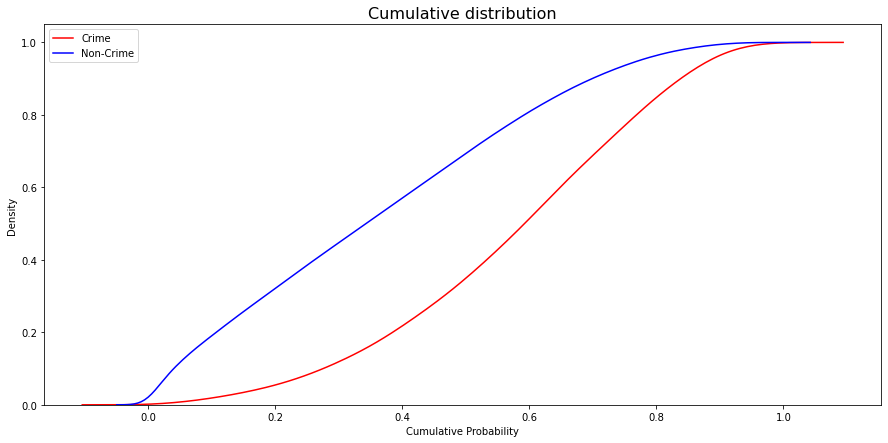

In [25]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 1], ax=ax,
               color='red', cumulative=True)
b = sns.kdeplot(data=results_brf['proba_crimen'][results_brf['crimen'] == 0], ax=ax,
               color='blue', cumulative=True)       

plt.title('Cumulative distribution', fontdict={'fontsize': 16})

plt.xlabel('Cumulative Probability')

plt.ylabel('Density')
plt.legend(labels=['Crime','Non-Crime'])

plt.show()

In [26]:
results_brf_agg = results_brf.groupby(['id_colonia', 'colonia']).agg({'proba_crimen':['mean', 'median', 'std'], 
                                                                      'predictions':'mean',
                                                                      'crimen':'mean'}).reset_index()

results_brf_agg.columns = ['_'.join(col).strip() for col in results_brf_agg.columns.values]


In [27]:
results_brf_agg.sort_values(by='proba_crimen_mean', ascending=False).head(10)

,id_colonia_,colonia_,proba_crimen_mean,proba_crimen_median,proba_crimen_std,predictions_mean,crimen_mean
725,726,SAN PEDRO CUAJIMALPA (PBLO),0.893795,0.901250,0.046203,0.590786,0.029810
584,585,SAN JERONIMO ACULCO - LIDICE (PBLO),0.876350,0.881250,0.045581,0.512195,0.035230
757,758,SANTIAGO TULYEHUALCO (PBLO),0.871307,0.876250,0.042618,1.000000,0.065041
201,202,JARDINES DEL PEDREGAL,0.863702,0.871250,0.063367,0.782609,0.035326
496,497,DEL CARMEN,0.863503,0.893333,0.077929,0.652174,0.040761
1712,1715,TIZAPAN_TIZAPAN SAN ANGEL,0.862251,0.870313,0.053768,0.809783,0.024457
215,216,PASEOS DE CHURUBUSCO,0.861333,0.866979,0.046023,0.894309,0.092141
849,850,TACUBA,0.861301,0.886875,0.075594,0.751337,0.141711
173,174,SAN MIGUEL TOPILEJO (PBLO),0.855930,0.866292,0.054345,0.615176,0.040650
52,53,SAN ANDRES TOTOLTEPEC (PBLO),0.851535,0.846042,0.062040,0.505435,0.043478


In [28]:
results_brf.reset_index(level=0, inplace=True, drop=True)

results_brf_recall = results_brf[results_brf['crimen'] == 1].copy()

results_brf_recall = results_brf_recall.groupby(results_brf['Hora'].dt.date)[['predictions']].mean().reset_index()

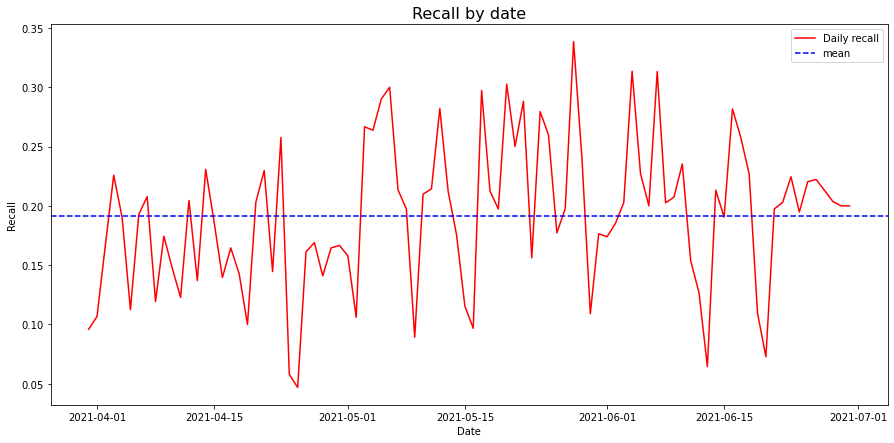

In [29]:
## Graficamos distribución kernel

fig = plt.figure(figsize=(15, 7))

ax = fig.subplots(1, 1)

a = sns.lineplot(data=results_brf_recall, y='predictions', x='Hora', ax=ax,
               color='red')

plt.title('Recall by date', fontdict={'fontsize': 16})

plt.xlabel('Date')

ax.axhline(y=results_brf_recall['predictions'].mean(), linestyle='--', color='blue')

plt.ylabel('Recall')
plt.legend(labels=['Daily recall', 'mean'])

plt.show()

In [30]:
results_brf_recall.groupby(results_brf['Hora'].dt.weekday)[['predictions']].mean().reset_index()

,Hora,predictions
0,0,0.229493
1,1,0.166755
2,2,0.190024
3,3,0.193218
4,4,0.192310
5,5,0.219654
6,6,0.149193
